In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from os import listdir
from glob import glob
from PIL import Image
import os
import cv2
import scipy.ndimage as ndimage
from skimage import io

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import load_img, img_to_array
from keras.losses import binary_crossentropy
from keras.models import Sequential,load_model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization 
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras import backend as K
from keras import activations
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers


from numpy import expand_dims

In [3]:
from split_image import split_image
from patchify import patchify,unpatchify


In [4]:
model=load_model("../models/final_imbalance_best_sgd2.hdf5")

In [30]:
img = Image.open("../data/testimages/test_patient_image.png")  # for example (3456, 5184, 3)
img = np.asarray(img)
#img = pic / 255
if len(img.shape) > 2 and img.shape[2] == 4:
    #slice off the alpha channel
    img = img[:, :, :3]# create new image of desired size and color (blue) for padding
image_height, image_width, channel_count = img.shape

if img.shape == (50,50,3):
        patches = img.copy()
        output_patches = np.empty(patches.shape).astype(np.uint8)
        pic=patches/255
        x=tf.stack([pic],axis=0)
        Y_pred = model.predict(x)
        y_pred = (Y_pred > 0.5).astype(np.int64)
        print("Prediction:",y_pred)
    
        if y_pred == 1:
            output_patches = np.full((50,50, 3), (0,0,255), dtype=np.uint8)  
        else:
            output_patches = patch.copy()

else:
    old_image_height, old_image_width, channels = img.shape
    print(old_image_height,old_image_width)
    new_image_height = img.shape[0]+50-img.shape[0]%50
    new_image_width = img.shape[1]+50-img.shape[1]%50
    print(new_image_height,new_image_width)
    color = (255,255,255)
    result = np.full((new_image_height,new_image_width, channels), color, dtype=np.uint8)
    print(result.shape)
# compute center offset
    x_center = (new_image_width - old_image_width) // 2
    y_center = (new_image_height - old_image_height) // 2
    print("X,Y Centre:",x_center,y_center)
    print(x_center+old_image_width,y_center+old_image_height)
# copy img image into center of result image
    result[y_center:y_center+old_image_height,x_center:x_center+old_image_width] = img
    image_height, image_width, channel_count = result.shape
    patch_height, patch_width, step = 50, 50, 50
    patch_shape = (patch_height, patch_width, channel_count)

    patches = patchify(result, patch_shape, step=step)

    #patch_height, patch_width, step = 50, 50, 50
    #patch_shape = (patch_height, patch_width, channel_count)
    #patches = patchify(img, patch_shape, step=step)

    print(patches.shape)
    output_patches = np.empty(patches.shape).astype(np.uint8)
    for i in range(patches.shape[0]):
        for j in range(patches.shape[1]):
            patch = patches[i, j, 0]
       # saveimg = Image.fromarray(patch)
       # num = i * patches.shape[1] + j
       # saveimg.save(f"../data/testimages/patches/patch_{num}.png")
            print(patch.shape)
            pic=patch/255
            x=tf.stack([pic],axis=0)
        
            Y_pred = model.predict(x)
            y_pred = (Y_pred > 0.5).astype(np.int64)
            #print("Prediction:",y_pred)

            if y_pred == 1:
                patch = np.full((50,50, 3), (0,0,255), dtype=np.uint8)  
                print("cancer")
                output_patches[i, j, 0] = patch
            else:
                output_patches[i, j, 0] = patch


2001 3701
2050 3750
(2050, 3750, 3)
X,Y Centre: 24 24
3725 2025
(41, 75, 1, 50, 50, 3)
(50, 50, 3)
1/1 [==============================] - 0s 13ms/step
(50, 50, 3)
1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [

1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0

1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0

1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0

1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 13ms/step
(50, 50, 3)
1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0

1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 13ms/step
(50, 50, 3)
1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0

1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0

1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0

(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 13ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 13ms/step
(50, 50, 3)
1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [=======================

1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0

1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [============================

1/1 [==============================] - 0s 9ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [=========================

1/1 [==============================] - 0s 9ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [=========================

1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s

1/1 [==============================] - 0s 9ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [===============

1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0

1/1 [==============================] - 0s 11ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [=========

1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0

1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
cancer
(50, 50, 3)
1/1 [===

1/1 [==============================] - 0s 9ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 9ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0

1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0s 11ms/step
(50, 50, 3)
1/1 [==============================] - 0s 12ms/step
(50, 50, 3)
1/1 [==============================] - 0s 10ms/step
(50, 50, 3)
1/1 [==============================] - 0

In [31]:
if output_patches.shape == (50,50,3):
    output_image = Image.fromarray(output_patches)
else:
    output_height = image_height - (image_height - patch_height) % step
    output_width = image_width - (image_width - patch_width) % step
    output_shape = (output_height, output_width, channel_count)
    output_image = unpatchify(output_patches, output_shape)
    output_image = Image.fromarray(output_image)

In [32]:
output_patches.shape

(41, 75, 1, 50, 50, 3)

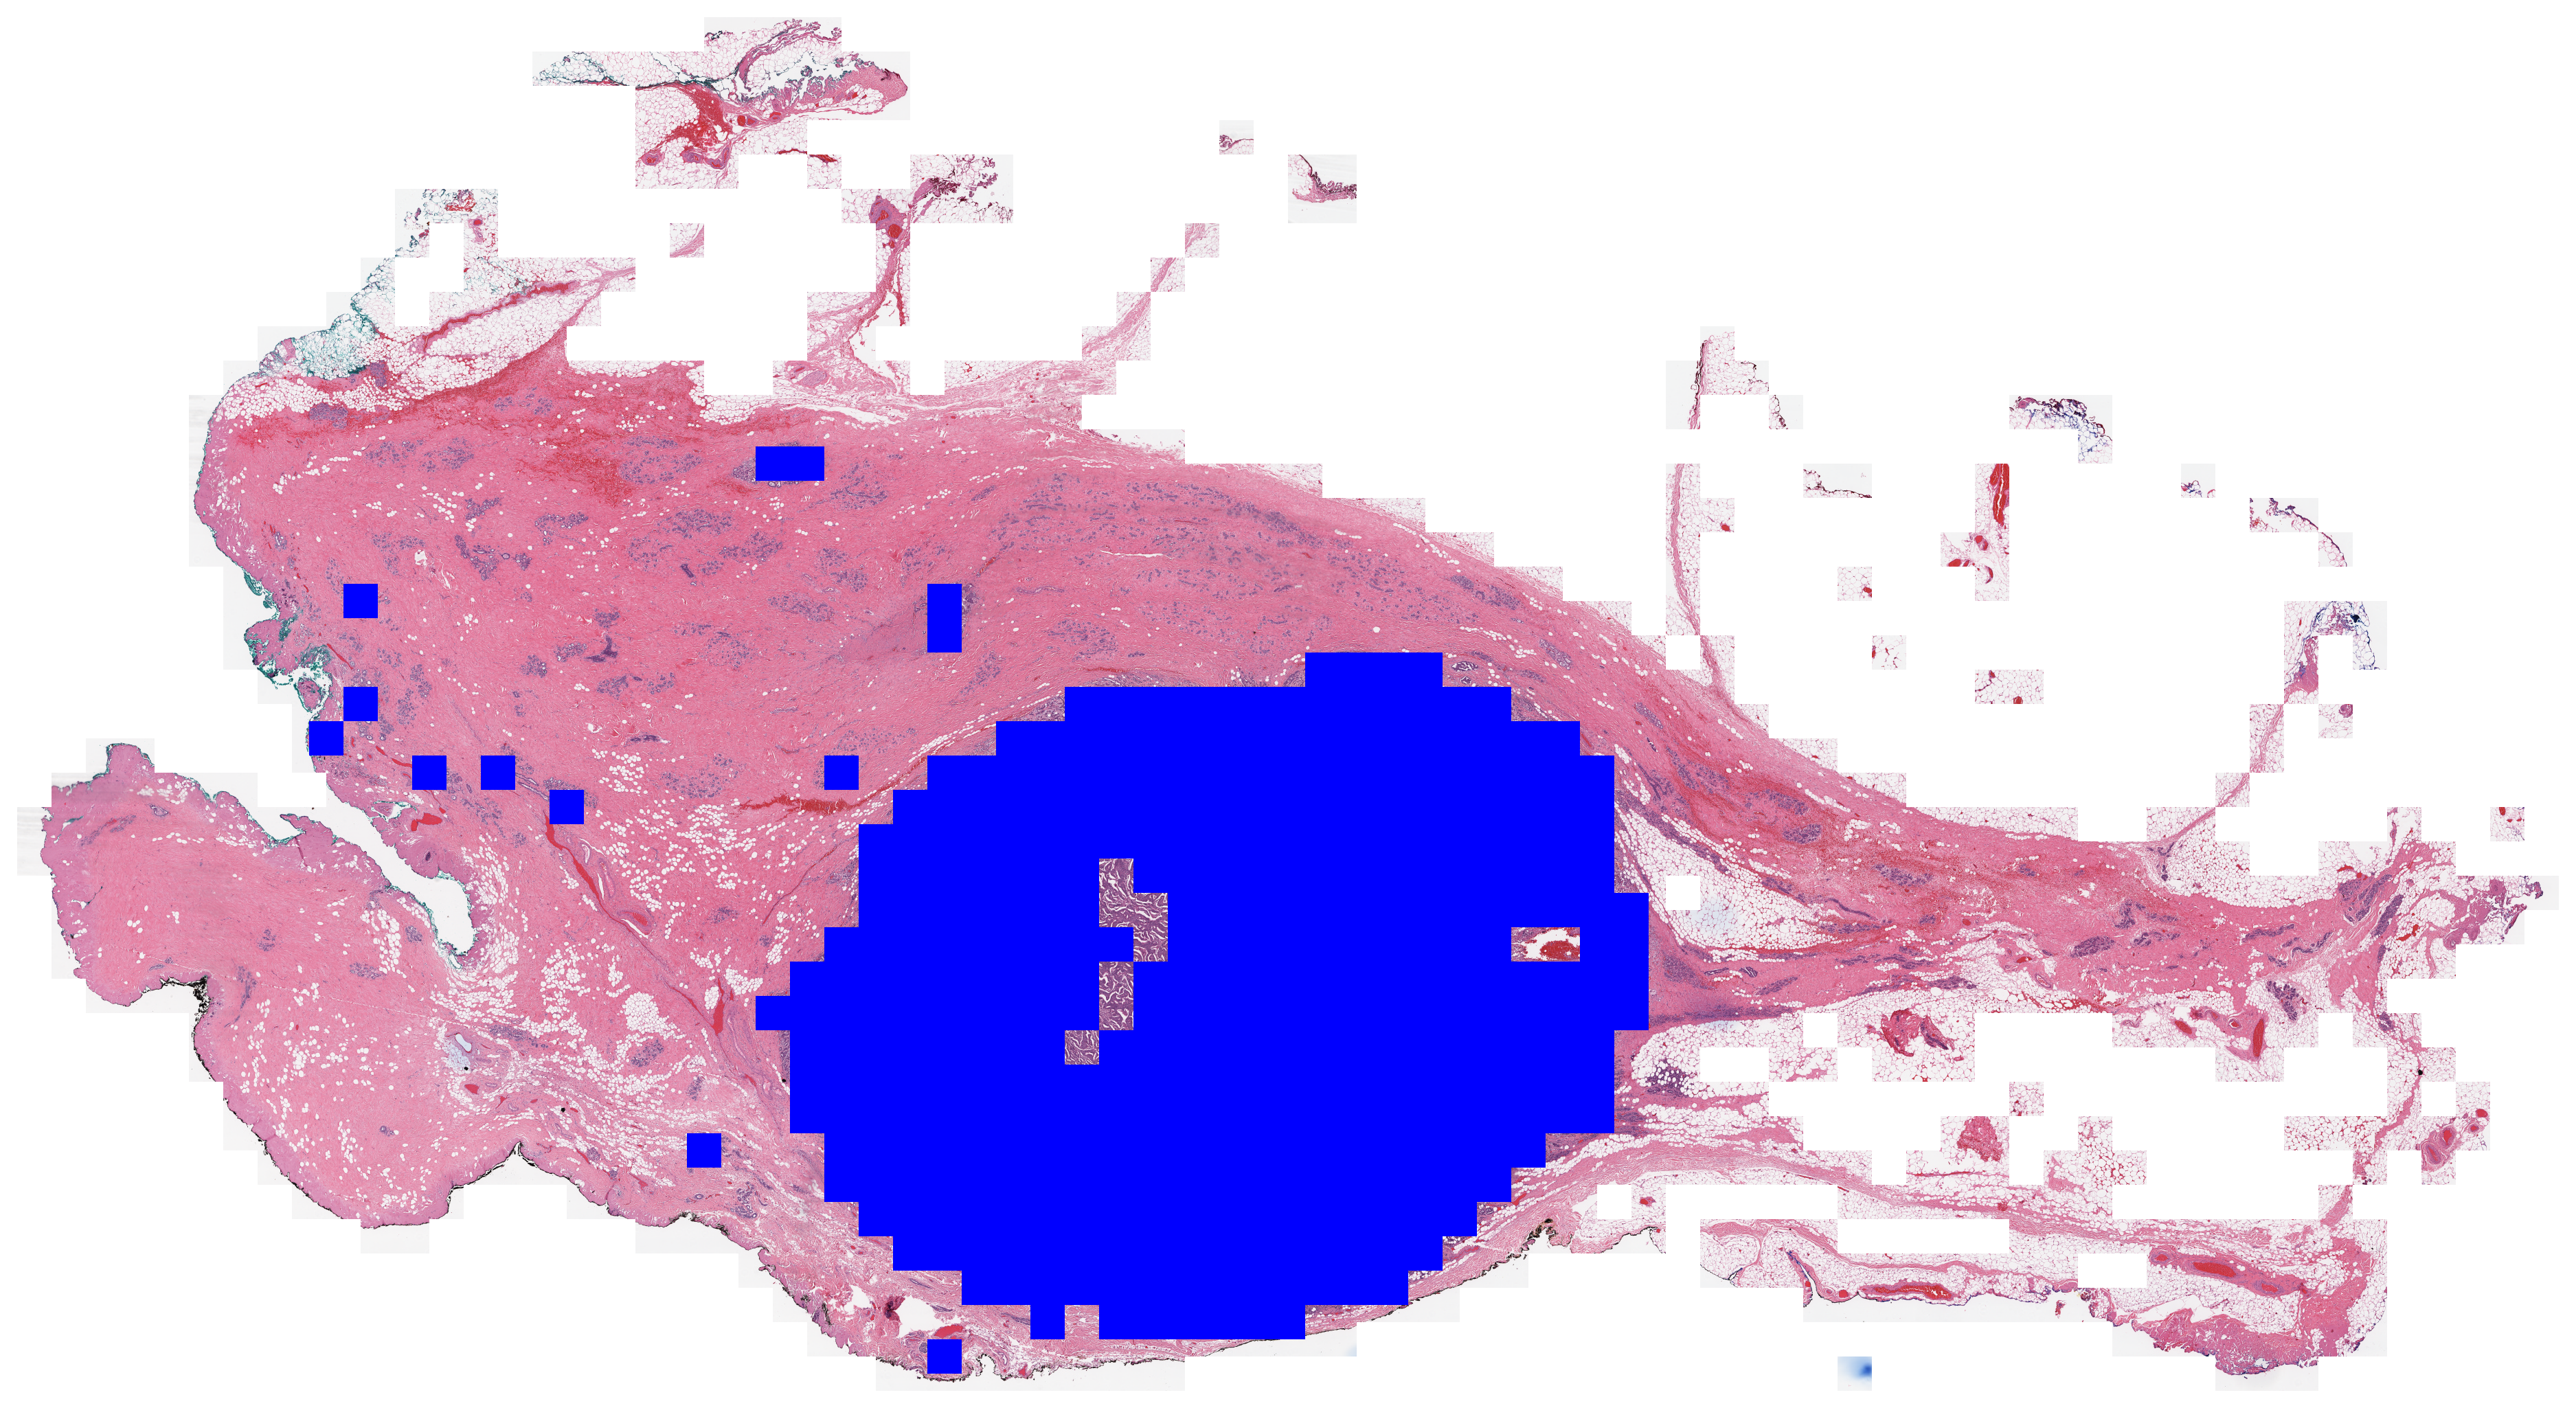

In [33]:
output_image